In [1]:
import tensorflow as tf
import numpy as np

2023-01-02 16:55:07.048858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# we would specify some parameter to be used in our datagenerators
# Batch size -> this indicates the number we would process at a time
# IMAGE_WIDTH AND IMAGE_HEIGHT -> this indicates that we would resize all our images to these width and height
#
BATCH_SIZE = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224

# ImageDatagenerator
 > this tool is used in tensorflow to fetch images from a specified directory
 > apply transformations on it such as rescaling, zooming, flipping shuffling e.t.c
 # Our dataset
 > our dataset has already been split into two folders
 * train
 * validation
> Each of the following folder contains the following folders
* Tomato___Late_blight
* Tomato___healthy
* Tomato___Early_blight
* Tomato___Septoria_leaf_spot
* Tomato___Tomato_Yellow_Leaf_Curl_Virus
* Tomato___Bacterial_spot
* Tomato___Target_spot
* Tomato___Tomator_mosaic_virus
* Tomato___Leaf_Mold
* Tomato___Spider_mites Two-spotted_spider_mite


> Each of the folder contains images that correspond to the folder name 

In [3]:
# we need to specify the classes we would be looking for to 
# the imagedata generators
classes = [
    'Tomato___Late_blight',
'Tomato___healthy',
'Tomato___Early_blight',
'Tomato___Septoria_leaf_spot',
'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
'Tomato___Bacterial_spot',
'Tomato___Target_Spot',
'Tomato___Tomato_mosaic_virus',
'Tomato___Leaf_Mold',
'Tomato___Spider_mites Two-spotted_spider_mite'
]

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/Users/msughter/Downloads/tomato/train'
validation_dir = '/Users/msughter/Downloads/tomato/val'
# Image datagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory(
     train_dir,
        batch_size=BATCH_SIZE,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
)

validation_datagenerator = validation_datagen.flow_from_directory(
    validation_dir,
     target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
        batch_size=BATCH_SIZE
)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


> as you can see there 11000 images that were found
> 10000 belonging to training.
> 1000 belonging to validation.
> This means it was splitted into 90% training and 10% validation by the researchers
> we would use the datagenerators to augment both the training and validation dataset
> we would then split the validation into 5% validation and 95%

# MobilenetV2 pretrained model
> The mobilenetv2 is trained on the imagenet dataset which has millions of images grouped into 1000 classes.
> we group the entire model into two parts
* The feature extraction layer (that has multiple convolutional and maxpooling layer) whose responsibility is to convert the image from an array of shape (224,224,3) into flattened array of shape 1280.
* The Classification layer takes in the flattened array of size 1280
  and predicts the class the image falls into by outputing an array of 1000 numbers each specifying the probality of the image being one of the labelled classes. the index with the highest probability is the predicted class
> Tensorflow provides built in tools to help us easily download and modify this model
> it has a parameter called inlude_top which we use to tell tensorflow if we want to keep the fully connected classification layer or not.
> in our case we have no use for it so we dropped it completely.

![mobilenetv2](/Users/msughter/projects/droneai/androidai/Shoping-list/mobilnetv2_architecture.jpeg)

In [8]:
from keras.applications.mobilenet_v2 import MobileNetV2

# set input shape of our model
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)

# loading the feature extraction model from mobilenet
mobilenet= MobileNetV2(input_shape=IMG_SHAPE, input_tensor=None,
                                                include_top=False, 
                                                weights='imagenet')

In [9]:
# defining the model 
feature_extractor = tf.keras.Sequential()
feature_extractor.add(mobilenet)
# Add a global average pooling layer to flatten the output features to 1280
feature_extractor.add(tf.keras.layers.GlobalAveragePooling2D())
# lets see the summary of the model
feature_extractor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 2,257,984
Trainable params: 2,223,872
Non-trainable params: 34,112
_________________________________________________________________


In [10]:
def extract_features(datagen,iterations):
    features = []
    labels = []
    i = 1
    for _,(image_batch,label_batch) in enumerate(datagen):
        if i > iterations:
            break
        print(f'extracting features for batch.....{i}')
        batch_features = feature_extractor.predict(image_batch)
        labels_list =  np.argmax(label_batch,axis=1)
        for img, label in zip(batch_features,labels_list):
            features.append(img)
            labels.append(label)
        i+=1
    return features, labels

## Infinite Generation of Data
 > our data generator is capable of fetching the stored images, applying transformations and genarating an infinite amount of images
 > it is our responsibility to tell it when to stop

In [11]:
train_x, train_y = extract_features(train_datagenerator,150)

extracting features for batch.....1
4/4 [==============================] - 3s 430ms/step
extracting features for batch.....2
4/4 [==============================] - 2s 419ms/step
extracting features for batch.....3
4/4 [==============================] - 2s 372ms/step
extracting features for batch.....4
4/4 [==============================] - 2s 381ms/step
extracting features for batch.....5
4/4 [==============================] - 2s 381ms/step
extracting features for batch.....6
4/4 [==============================] - 2s 372ms/step
extracting features for batch.....7
4/4 [==============================] - 2s 387ms/step
extracting features for batch.....8
4/4 [==============================] - 2s 377ms/step
extracting features for batch.....9
4/4 [==============================] - 2s 416ms/step
extracting features for batch.....10
4/4 [==============================] - 2s 437ms/step
extracting features for batch.....11
4/4 [==============================] - 2s 471ms/step
extracting features

In [12]:
validation_test_features,validation_test_labels = extract_features(validation_datagenerator,15)

extracting features for batch.....1
4/4 [==============================] - 2s 401ms/step
extracting features for batch.....2
4/4 [==============================] - 2s 441ms/step
extracting features for batch.....3
4/4 [==============================] - 2s 421ms/step
extracting features for batch.....4
4/4 [==============================] - 2s 385ms/step
extracting features for batch.....5
4/4 [==============================] - 2s 383ms/step
extracting features for batch.....6
4/4 [==============================] - 2s 385ms/step
extracting features for batch.....7
4/4 [==============================] - 2s 385ms/step
extracting features for batch.....8
4/4 [==============================] - 2s 384ms/step
extracting features for batch.....9
4/4 [==============================] - 2s 388ms/step
extracting features for batch.....10
4/4 [==============================] - 2s 392ms/step
extracting features for batch.....11
4/4 [==============================] - 2s 389ms/step
extracting features

## Splitting the validation data
> since the dataset has already been split into train and validation
> we split the validation data into 95% test and 5% validation

In [13]:
print(f'Training data is now {len(train_x)} an increase by {len(train_x)-10000} through augmentation')
print(f'Validation data is now {len(validation_test_features)} an increase by {len(validation_test_features)-1000} through augmentation')

Training data is now 15000 an increase by 5000 through augmentation
Validation data is now 1500 an increase by 500 through augmentation


In [14]:
from sklearn.model_selection import train_test_split
# splitting the validation_test into 95% test and 5% validation
val_x,test_x,val_y, test_y= train_test_split(validation_test_features,validation_test_labels,test_size=0.95, random_state=42)

# Training the SVM
> we attempt training the a polynomial svm at degree 1,2,3
> by varying the degree parameter we would see how it affects the performance

In [15]:
from sklearn import svm

# we would start with degree
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(train_x, train_y)

In [17]:
# importing some evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Accuracy (POLY Kernel):  89.33
F1 (POLY Kernel):  88.94


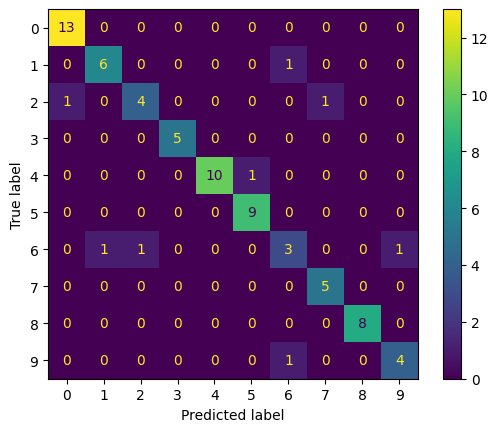

In [18]:
poly_pred_val = poly.predict(val_x)
poly_accuracy_val = accuracy_score(val_y, poly_pred_val)
poly_f1_val = f1_score(val_y, poly_pred_val, average='weighted')
cm = confusion_matrix(val_y, poly_pred_val,labels=poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly.classes_)
disp.plot()
print('Accuracy (POLY Kernel): ', "%.2f" % (poly_accuracy_val*100))
print('F1 (POLY Kernel): ', "%.2f" % (poly_f1_val*100))

Accuracy (POLY Kernel):  87.51
F1 (POLY Kernel):  87.41


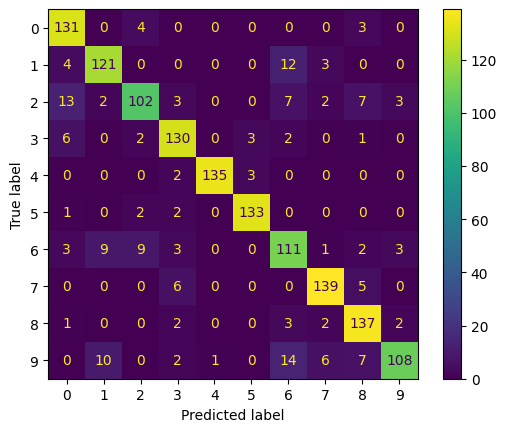

In [19]:
poly_pred_test = poly.predict(test_x)
poly_accuracy_test = accuracy_score(test_y, poly_pred_test)
poly_f1_test = f1_score(test_y, poly_pred_test, average='weighted')
cm = confusion_matrix(test_y, poly_pred_test,labels=poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly.classes_)
disp.plot()
print('Accuracy (POLY Kernel): ', "%.2f" % (poly_accuracy_test*100))
print('F1 (POLY Kernel): ', "%.2f" % (poly_f1_test*100))

In [20]:
# Change the degree of the SVM classifier to 2
poly2 = svm.SVC(kernel='poly', degree=2, C=1).fit(train_x, train_y)

Accuracy (Poly2 Kernel with degree 2):  90.67
F1 (Poly2 Kernel with degree 2):  90.07


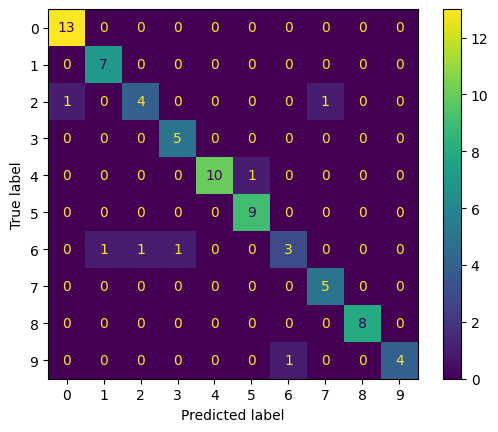

In [21]:
poly2_pred_val = poly2.predict(val_x)
poly2_accuracy_val = accuracy_score(val_y, poly2_pred_val)
poly2_f1_val = f1_score(val_y, poly2_pred_val, average='weighted')
cm = confusion_matrix(val_y, poly2_pred_val,labels=poly2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly2.classes_)
disp.plot()
print('Accuracy (Poly2 Kernel with degree 2): ', "%.2f" % (poly2_accuracy_val*100))
print('F1 (Poly2 Kernel with degree 2): ', "%.2f" % (poly2_f1_val*100))

Accuracy (Poly2 Kernel with degree 2):  86.81
F1 (Poly2 Kernel with degree 2):  86.64


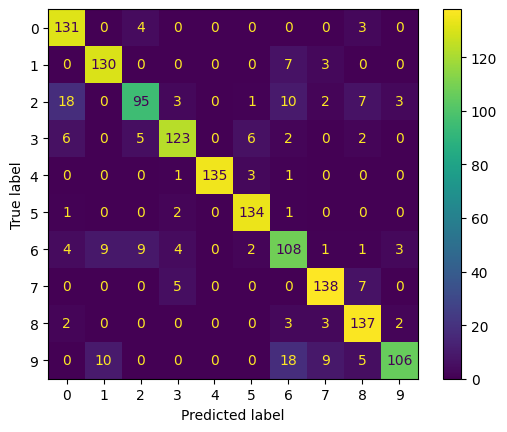

In [22]:
# changing the degree to 2 has boosted the performance a bit
poly2_pred_test = poly2.predict(test_x)
poly2_accuracy_test = accuracy_score(test_y, poly2_pred_test)
poly2_f1_test = f1_score(test_y, poly2_pred_test, average='weighted')
cm = confusion_matrix(test_y, poly2_pred_test,labels=poly2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly2.classes_)
disp.plot()
print('Accuracy (Poly2 Kernel with degree 2): ', "%.2f" % (poly2_accuracy_test*100))
print('F1 (Poly2 Kernel with degree 2): ', "%.2f" % (poly2_f1_test*100))

In [23]:
# change the degree to 1
poly1 = svm.SVC(kernel='poly', degree=1, C=1).fit(train_x, train_y)

Accuracy (Poly1 Kernel with degree 1):  88.00
F1 (Poly1 Kernel with degree 1):  87.46


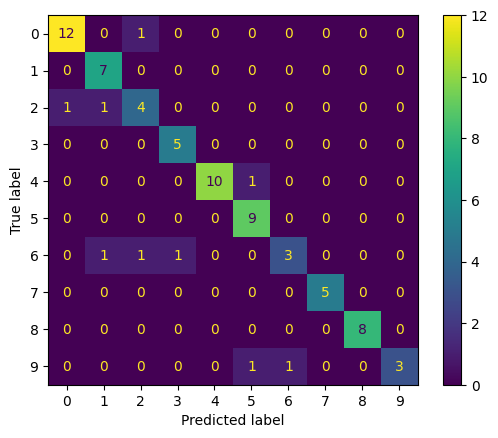

In [24]:
poly1_pred_val = poly1.predict(val_x)
poly1_accuracy_val = accuracy_score(val_y, poly1_pred_val)
poly1_f1_val = f1_score(val_y, poly1_pred_val, average='weighted')
cm = confusion_matrix(val_y, poly1_pred_val,labels=poly1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly1.classes_)
disp.plot()
print('Accuracy (Poly1 Kernel with degree 1): ', "%.2f" % (poly1_accuracy_val*100))
print('F1 (Poly1 Kernel with degree 1): ', "%.2f" % (poly1_f1_val*100))

Accuracy (Poly1 Kernel with degree 1):  85.26
F1 (Poly1 Kernel with degree 1):  85.03


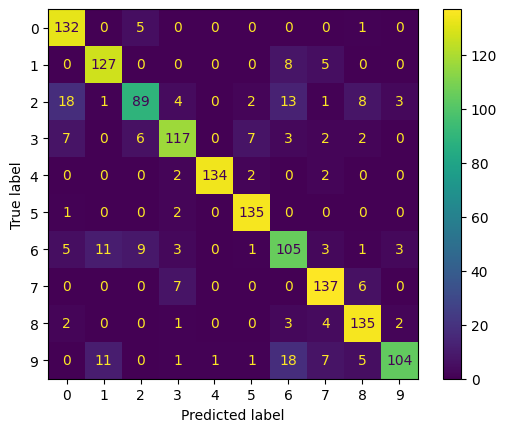

In [25]:
poly1_pred_test = poly1.predict(test_x)
poly1_accuracy_test = accuracy_score(test_y, poly1_pred_test)
poly1_f1_test = f1_score(test_y, poly1_pred_test, average='weighted')
cm = confusion_matrix(test_y, poly1_pred_test,labels=poly1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly1.classes_)
disp.plot()
print('Accuracy (Poly1 Kernel with degree 1): ', "%.2f" % (poly1_accuracy_test*100))
print('F1 (Poly1 Kernel with degree 1): ', "%.2f" % (poly1_f1_test*100))